1 plot eckert results

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import re
import pandas as pd

1.0 basic figure style

In [3]:
import matplotlib.pyplot as plt

def basic_figure_style():
    SMALL_SIZE = 5*4                                       
    MEDIUM_SIZE = 8*2
    BIGGER_SIZE = 10*4

    plt.rc('font', size=MEDIUM_SIZE, family='serif')          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)                     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE, direction='out')    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE, direction='out')    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)                    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
    plt.rc('lines', linewidth=1) 
    plt.rc('axes', grid=True) #
    plt.rc('grid', alpha=0.7) #
    plt.rc('xtick', top=True)
    plt.rc('ytick', right=True)
    plt.rc('axes.formatter', use_mathtext=True, min_exponent=4, useoffset=False)
    plt.rc('figure', figsize='6, 6')                         # size of the figure, used to be '4, 3' in inches

    # Set LaTeX rendering to True
    plt.rc('text', usetex=False)

basic_figure_style()


1.01 norm spex2xspec

In [5]:
# xspec
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

def norm_sp2xp(reds, n_spex):
    DA = cosmo.angular_diameter_distance(reds).to_value(u.cm)
    n_spex = n_spex*1e64/1e6# m-3 to cm-3
    return 1e-14/(4*np.pi*(DA*(1+reds))**2)*n_spex

1.1 set path

In [63]:

# ########## RGH80 ##########
# homepath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/RGH80'
# src = 'RGH80'

########## ID3460 #########
homepath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/ID3460'
src = 'SDSSTG3460'
src1 = 'ID3460'

# # ########## ID828 #########
# homepath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/ID828'
# src = 'SDSSTG828'
# src1 = 'ID828'

# # ########## ID9647 #########
# homepath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/ID9647'
# src = 'SDSSTG9647'
# src1 = 'ID9647'

######### subpaths ########
# ecpath = f'{homepath}/eckert/spec_ana' # RGH80
ecpath = f'{homepath}/eckert/{src1}/spec_ana'

######### savepath ######## 
savepath = f'{homepath}/fig'
os.makedirs(savepath, exist_ok=True)


1.2 read out eckert data

In [64]:
flist = glob(f'{ecpath}/*results.txt')
regpath = glob(f'{homepath}/eckert/{src}/*/regions')[0] # 

data_dict = {'reg':[], 'r [arcmin]':[], 'T [keV]':[], 'Terr_lo':[], 'Terr_hi':[], 'Z [solar (aspl)]':[], 'Zerr_lo':[], 'Zerr_hi':[], 'Norm':[], 'Nerr_lo':[], 'Nerr_hi':[]}

for file in flist:
    regnum = int(file.split('reg')[-1].split('_')[0])
    data_dict['reg'].append(regnum)

    regf = open(f'{regpath}/{src}_reg{regnum}.reg')
    regline = regf.readlines()[-1]
    data_dict['r [arcmin]'].append(float(regline.split(',')[-1][:-3]))
    regf.close()

    f = open(file)
    lines = f.readlines()[:]
    f.close()
    for line in lines:
        
        if 'keV' in line:
            data_dict['T [keV]'].append(float(line.split(' ')[2]))
            data_dict['Terr_lo'].append(float(line.split(' ')[3]))
            data_dict['Terr_hi'].append(float(line.split(' ')[4]))
        elif 'solar' in line:
            if 'fixed' in line:
                data_dict['Z [solar (aspl)]'].append(float(line.split(' ')[2]))
                data_dict['Zerr_lo'].append(0)
                data_dict['Zerr_hi'].append(0)
            else:
                data_dict['Z [solar (aspl)]'].append(float(line.split(' ')[2]))
                data_dict['Zerr_lo'].append(float(line.split(' ')[3]))
                data_dict['Zerr_hi'].append(float(line.split(' ')[4]))
        elif 'Norm' in line:
            data_dict['Norm'].append(float(line.split(' ')[1]))
            data_dict['Nerr_lo'].append(float(line.split(' ')[2]))
            data_dict['Nerr_hi'].append(float(line.split(' ')[3]))
        else:
            print(f'Not recognized line: {line}')
            continue

# # reorder the index
idx = np.argsort(data_dict['reg'])
for name in data_dict.keys():
    data_dict[name] = np.array(data_dict[name])
    data_dict[name] = data_dict[name][idx]
    data_dict[name][(np.array(data_dict[name])<0)] = 0

# save the csv
df = pd.DataFrame(data_dict)
df.to_csv(f'{savepath}/{src}-eckert-results.csv', index=False)

IndexError: list index out of range

In [72]:
print(df['T [keV]'].to_string(index=False) )

7.4011
2.6773
3.2757
3.7797
3.5905
3.1400
2.9848
3.1613
2.3814
2.1511
2.1507
2.6137
1.8157


1.3 read out my data

In [139]:
mypath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/ID9647/fitting/dom_pnmos'
file = f'{mypath}/dom_pnmos.csv'
src = 'ID9647'

pippath = glob(f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/ID9647/eckert/ID9647/*/fit_231019/csvs')[0]

In [140]:
df_my = pd.read_csv(file)
df_pip = pd.read_csv(f'{pippath}/SDSSTG3460_annuli_mypar.csv')

1.4 make plots: T, Z, norm

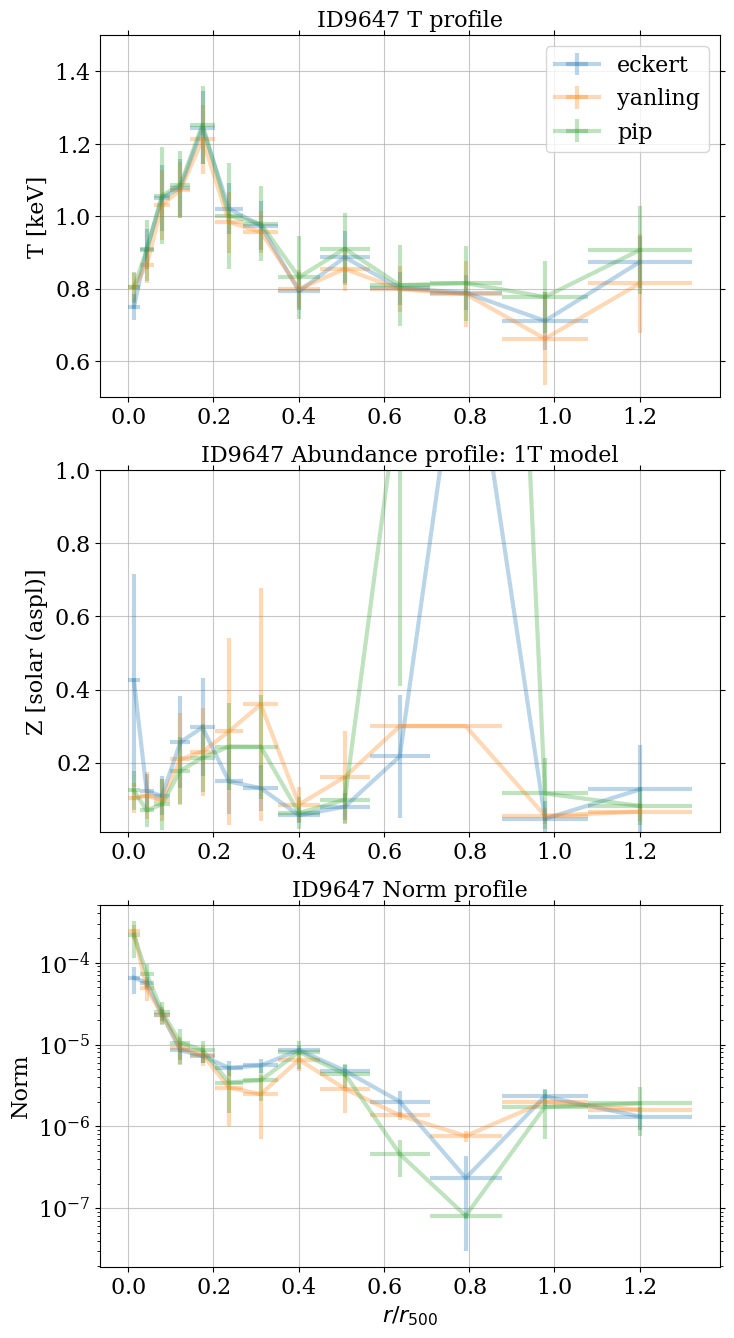

In [142]:

# f = open(f'{regpath}/R500.reg')
# r500 = float(f.readlines()[-1].split(',')[-1][:-3])

# # RGH80
# r500 = 7.35216
# # ID9647
# r500 = 9.17026
# # ID828
# r500 = 10.2579
# ID3460
r500=7.59404

fig, axs = plt.subplots(3,1, figsize=(8,16))

binmid = (df_pip['rlo'] + df_pip['rhi'])/2
binstep = np.diff(np.insert(np.array(df_pip['rhi']),0,0))/2

binmid = binmid/r500
binstep = binstep/r500


# ## filter the unconstrained abundance
# df_my['yanling-Zerr'][(df_my['yanling-Zerr']>1)] = np.nan
# df_my['yanling-Z'][(df_my['yanling-Z']>1)] = np.nan

# eckert
axs[0].errorbar(binmid, df_my['eckert-T'], xerr = binstep, yerr = np.array(df_my['eckert-Terrlo'], df_my['eckert-Terrhi']),alpha = 0.3, label = 'eckert')
axs[1].errorbar(binmid, df_my['eckert-Z'], xerr = binstep, yerr = np.array(df_my['eckert-Zerrlo'], df_my['eckert-Zerrhi']),alpha = 0.3)
axs[2].errorbar(binmid, df_my['eckert-N'], xerr = binstep, yerr = np.array(df_my['eckert-Nerrlo'], df_my['eckert-Nerrhi']),alpha = 0.3)

# my
axs[0].errorbar(binmid, df_my['yanling-T'], xerr = binstep, yerr = np.array(df_my['yanling-Terr'], df_my['yanling-Terr']),alpha = 0.3, label = 'yanling')
axs[1].errorbar(binmid, df_my['yanling-Z'], xerr = binstep, yerr = np.array(df_my['yanling-Zerr'], df_my['yanling-Zerr']),alpha = 0.3)
axs[2].errorbar(binmid, df_my['yanling-N'], xerr = binstep, yerr = np.array(df_my['yanling-Nerr'], df_my['yanling-Nerr']),alpha = 0.3)

# my-pipeline
axs[0].errorbar(binmid, df_pip['T-value'], xerr = binstep, yerr = np.array(df_pip['T-errlo'], df_pip['T-errhi']),alpha = 0.3, label = 'pip')
axs[1].errorbar(binmid, df_pip['Z-value'], xerr = binstep, yerr = np.array(df_pip['Z-errlo'], df_pip['Z-errhi']),alpha = 0.3)
axs[2].errorbar(binmid, df_pip['n-value'], xerr = binstep, yerr = np.array(df_pip['n-errlo'], df_pip['n-errhi']),alpha = 0.3)

# plot settings
axs[0].set_title(f'{src} T profile')
axs[0].set_ylabel('T [keV]')
axs[0].legend()
axs[0].set_ylim(0.5,1.5)

axs[1].set_title(f'{src} Abundance profile: 1T model')
axs[1].set_ylabel('Z [solar (aspl)]')
axs[1].set_ylim(0.01,1)

axs[2].set_title(f'{src} Norm profile')
axs[2].set_ylabel('Norm')
axs[2].set_xlabel(r'$r/r_{500}$')
axs[2].set_yscale('log')



2 make 2T plot

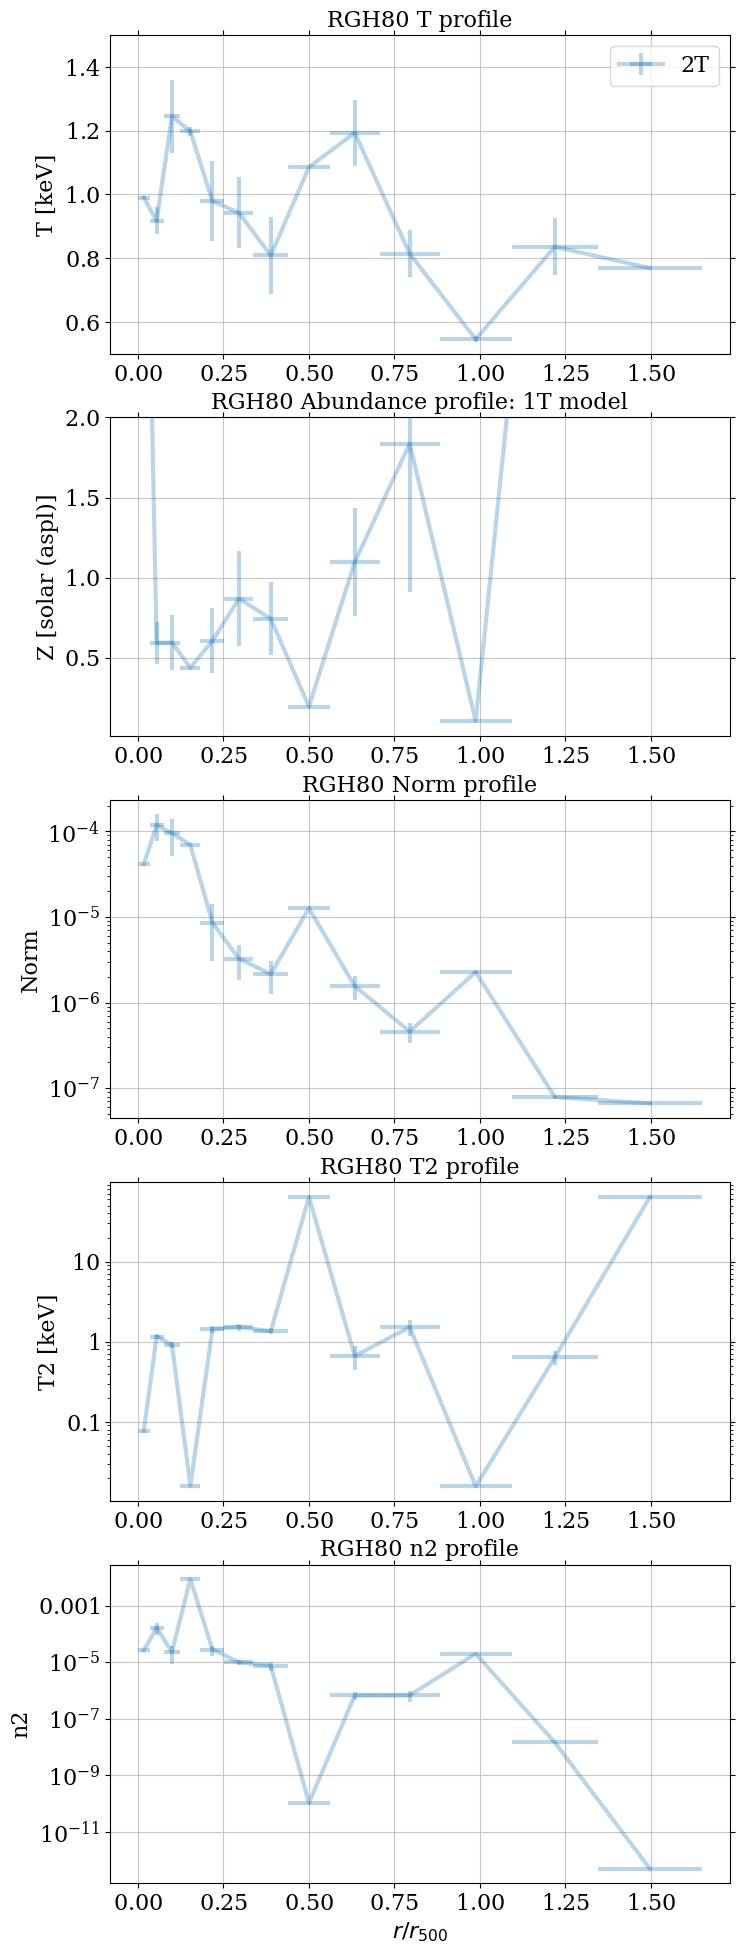

In [175]:
### RGH80 ####
pippath = glob(f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/RGH80/eckert/*/fit_231019/csvs')[0]
df_pip = pd.read_csv(f'{pippath}/RGH80_annuli_mypar_2T.csv')
src = 'RGH80'

# #### IDxxx ####
# srcnum = 9647
# src = f'ID{srcnum}'
# pippath = glob(f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/ID{srcnum}/eckert/ID{srcnum}/*/fit_231019/csvs')[0]
# df_pip = pd.read_csv(f'{pippath}/SDSSTG{srcnum}_annuli_mypar_2T.csv')

# RGH80
r500 = 7.35216
# # ID9647
# r500 = 9.17026
# # ID828
# r500 = 10.2579
# # ID3460
# r500=7.59404

fig, axs = plt.subplots(5,1, figsize=(8,24))

binmid = (df_pip['rlo'] + df_pip['rhi'])/2
binstep = np.diff(np.insert(np.array(df_pip['rhi']),0,0))/2

binmid = binmid/r500
binstep = binstep/r500


# ## mark the unconstrained abundance
# df_pip['yanling-Zerr'][(df_pip['yanling-Zerr']>1)] = np.nan
# df_pip['yanling-Z'][(df_pip['yanling-Z']>1)] = np.nan

# my-pipeline
axs[0].errorbar(binmid, df_pip['T-value'], xerr = binstep, yerr = np.array(df_pip['T-errlo'], df_pip['T-errhi']),alpha = 0.3, label = '2T')
axs[1].errorbar(binmid, df_pip['Z-value'], xerr = binstep, yerr = np.array(df_pip['Z-errlo'], df_pip['Z-errhi']),alpha = 0.3)
axs[2].errorbar(binmid, df_pip['n-value'], xerr = binstep, yerr = np.array(df_pip['n-errlo'], df_pip['n-errhi']),alpha = 0.3)
axs[3].errorbar(binmid, df_pip['T2-value'], xerr = binstep, yerr = np.array(df_pip['T2-errlo'], df_pip['T2-errhi']),alpha = 0.3)
axs[4].errorbar(binmid, df_pip['n2-value'], xerr = binstep, yerr = np.array(df_pip['n2-errlo'], df_pip['n2-errhi']),alpha = 0.3)

# plot settings
axs[0].set_title(f'{src} T profile')
axs[0].set_ylabel('T [keV]')
axs[0].legend()
axs[0].set_ylim(0.5,1.5)

axs[1].set_title(f'{src} Abundance profile: 1T model')
axs[1].set_ylabel('Z [solar (aspl)]')
axs[1].set_ylim(0.01,2)

axs[2].set_title(f'{src} Norm profile')
axs[2].set_ylabel('Norm')
axs[2].set_yscale('log')

# plot settings
axs[3].set_title(f'{src} T2 profile')
axs[3].set_ylabel('T2 [keV]')
axs[3].set_yscale('log')

axs[4].set_title(f'{src} n2 profile')
axs[4].set_ylabel('n2')
axs[4].set_xlabel(r'$r/r_{500}$')
axs[4].set_yscale('log')


2.1 make 2T plot with T2 fix with 0.5 T1

Text(0.5, 0, '$r/r_{500}$')

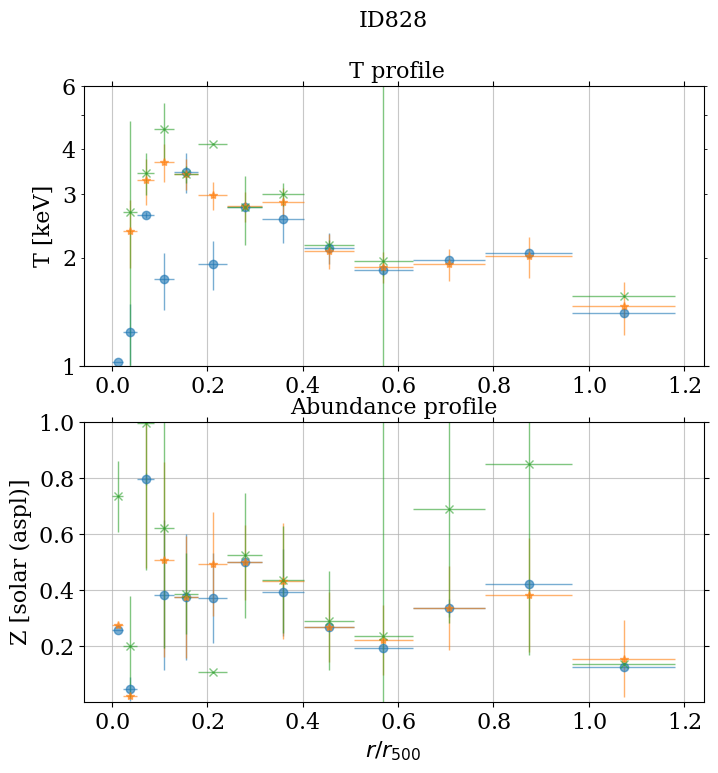

In [295]:
# ### RGH80 ####
# pippath = glob(f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/RGH80/eckert/*/fit_231019/csvs')[0]
# df_pip2 = pd.read_csv(f'{pippath}/RGH80_annuli_mypar_2T_fixT2.csv')
# df_pip = pd.read_csv(f'{pippath}/RGH80_annuli_mypar_2T.csv')
# df_pip1 = pd.read_csv(f'{pippath}/RGH80_annuli_mypar.csv')
# df_gadem = pd.read_csv(f'{pippath}/RGH80_annuli_mypar_GADEM.csv')
# src = 'RGH80'

#### IDxxx ####
srcnum = 828
src = f'ID{srcnum}'
pippath = glob(f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/ID{srcnum}/eckert/ID{srcnum}/*/fit_231019/csvs')[0]
df_pip2 = pd.read_csv(f'{pippath}/SDSSTG{srcnum}_annuli_mypar_2T_fixT2.csv')
df_pip = pd.read_csv(f'{pippath}/SDSSTG{srcnum}_annuli_mypar_2T.csv')
df_pip1 = pd.read_csv(f'{pippath}/SDSSTG{srcnum}_annuli_mypar.csv')
df_gadem = pd.read_csv(f'{pippath}/SDSSTG{srcnum}_annuli_mypar_GADEM.csv')


r500_dict = {'ID9647':9.17026, 'ID828':10.2579, 'ID3460':7.59404, 'RGH80':7.35216}

r500 = r500_dict[src]

fig, axs = plt.subplots(2,1, figsize=(8,8))

binmid = (df_pip['rlo'] + df_pip['rhi'])/2
binstep = np.diff(np.insert(np.array(df_pip['rhi']),0,0))/2

binmid = binmid/r500
binstep = binstep/r500


# ## mark the unconstrained abundance
# df_pip['yanling-Zerr'][(df_pip['yanling-Zerr']>1)] = np.nan
# df_pip['yanling-Z'][(df_pip['yanling-Z']>1)] = np.nan

# 2T
axs[0].errorbar(binmid, df_pip['T-value'], xerr = binstep, yerr = np.array(df_pip['T-errlo'], df_pip['T-errhi']),alpha = 0.6, fmt = 'o', label = '2T')
axs[1].errorbar(binmid, df_pip['Z-value'], xerr = binstep, yerr = np.array(df_pip['Z-errlo'], df_pip['Z-errhi']),alpha = 0.6, fmt = 'o')
# axs[2].errorbar(binmid, df_pip['n-value'], xerr = binstep, yerr = np.array(df_pip['n-errlo'], df_pip['n-errhi']),alpha = 0.6, fmt = 'o')
# axs[3].errorbar(binmid, df_pip['T2-value'], xerr = binstep, yerr = np.array(df_pip['T2-errlo'], df_pip['T2-errhi']),alpha = 0.6, fmt = 'o')
# axs[4].errorbar(binmid, df_pip['n2-value'], xerr = binstep, yerr = np.array(df_pip['n2-errlo'], df_pip['n2-errhi']),alpha = 0.6, fmt = 'o')

# # 2T-fix_T2
# axs[0].errorbar(binmid, df_pip2['T-value'], xerr = binstep, yerr = np.array(df_pip2['T-errlo'], df_pip2['T-errhi']),alpha = 0.6, fmt = 'P', label = '2T_fixT2')
# axs[1].errorbar(binmid, df_pip2['Z-value'], xerr = binstep, yerr = np.array(df_pip2['Z-errlo'], df_pip2['Z-errhi']),alpha = 0.6, fmt = 'P')
# # axs[2].errorbar(binmid, df_pip2['n-value'], xerr = binstep, yerr = np.array(df_pip2['n-errlo'], df_pip2['n-errhi']),alpha = 0.6, fmt = 'P')
# # axs[4].errorbar(binmid, df_pip2['n2-value'], xerr = binstep, yerr = np.array(df_pip2['n2-errlo'], df_pip2['n2-errhi']),alpha = 0.6, fmt = 'P')

# 1T
axs[0].errorbar(binmid, df_pip1['T-value'], xerr = binstep, yerr = np.array(df_pip1['T-errlo'], df_pip1['T-errhi']),alpha = 0.6, fmt = '*', label = '1T')
axs[1].errorbar(binmid, df_pip1['Z-value'], xerr = binstep, yerr = np.array(df_pip1['Z-errlo'], df_pip1['Z-errhi']),alpha = 0.6, fmt = '*')
# axs[2].errorbar(binmid, df_pip1['n-value'], xerr = binstep, yerr = np.array(df_pip1['n-errlo'], df_pip1['n-errhi']),alpha = 0.6, fmt = '*')

# gadem
axs[0].errorbar(binmid, df_gadem['T-value'], xerr = binstep, yerr = np.array(df_gadem['T-errlo'], df_gadem['T-errhi']),alpha = 0.6, fmt = 'x', label = 'GADEM')
axs[1].errorbar(binmid, df_gadem['Z-value'], xerr = binstep, yerr = np.array(df_gadem['Z-errlo'], df_gadem['Z-errhi']),alpha = 0.6, fmt = 'x')
# axs[2].errorbar(binmid, df_gadem['n-value'], xerr = binstep, yerr = np.array(df_gadem['n-errlo'], df_gadem['n-errhi']),alpha = 0.6, fmt = 'x', label = 'GADEM')

# plot settings
axs[0].set_title(f'{src}\n\n T profile')
axs[0].set_ylabel('T [keV]')
axs[0].set_ylim(1,6.0)
axs[0].set_yscale('log')

axs[1].set_title(f'Abundance profile')
axs[1].set_ylabel('Z [solar (aspl)]')
axs[1].set_ylim(0.001,1.0)
axs[1].set_xlabel(r'$r/r_{500}$')
# axs[2].set_title(f'Norm profile')
# axs[2].set_ylabel('Norm')
# axs[2].set_yscale('log')
# axs[2].set_ylim(1e-12, 0.02)
# # plot settings
# axs[3].set_title(f'T2 profile')
# axs[3].set_ylabel('T2 [keV]')
# axs[3].set_yscale('log')
# # axs[3].set_ylim(0.01,5.0)

# axs[4].set_title(f'n2 profile')
# axs[4].set_ylabel('n2')
# axs[4].set_xlabel(r'$r/r_{500}$')
# axs[4].set_yscale('log')
# axs[4].set_ylim(1e-16, 0.1)

# ## mark the unconstrained abundance
# df_pip2['yanling-Zerr'][(df_pip2['yanling-Zerr']>1)] = np.nan
# df_pip2['yanling-Z'][(df_pip2['yanling-Z']>1)] = np.nan



# axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))


2.2 make ratio plot
T/T1 in 2T
n/n1 in 2T
T0 in GDEM
sigmaT in GDEM

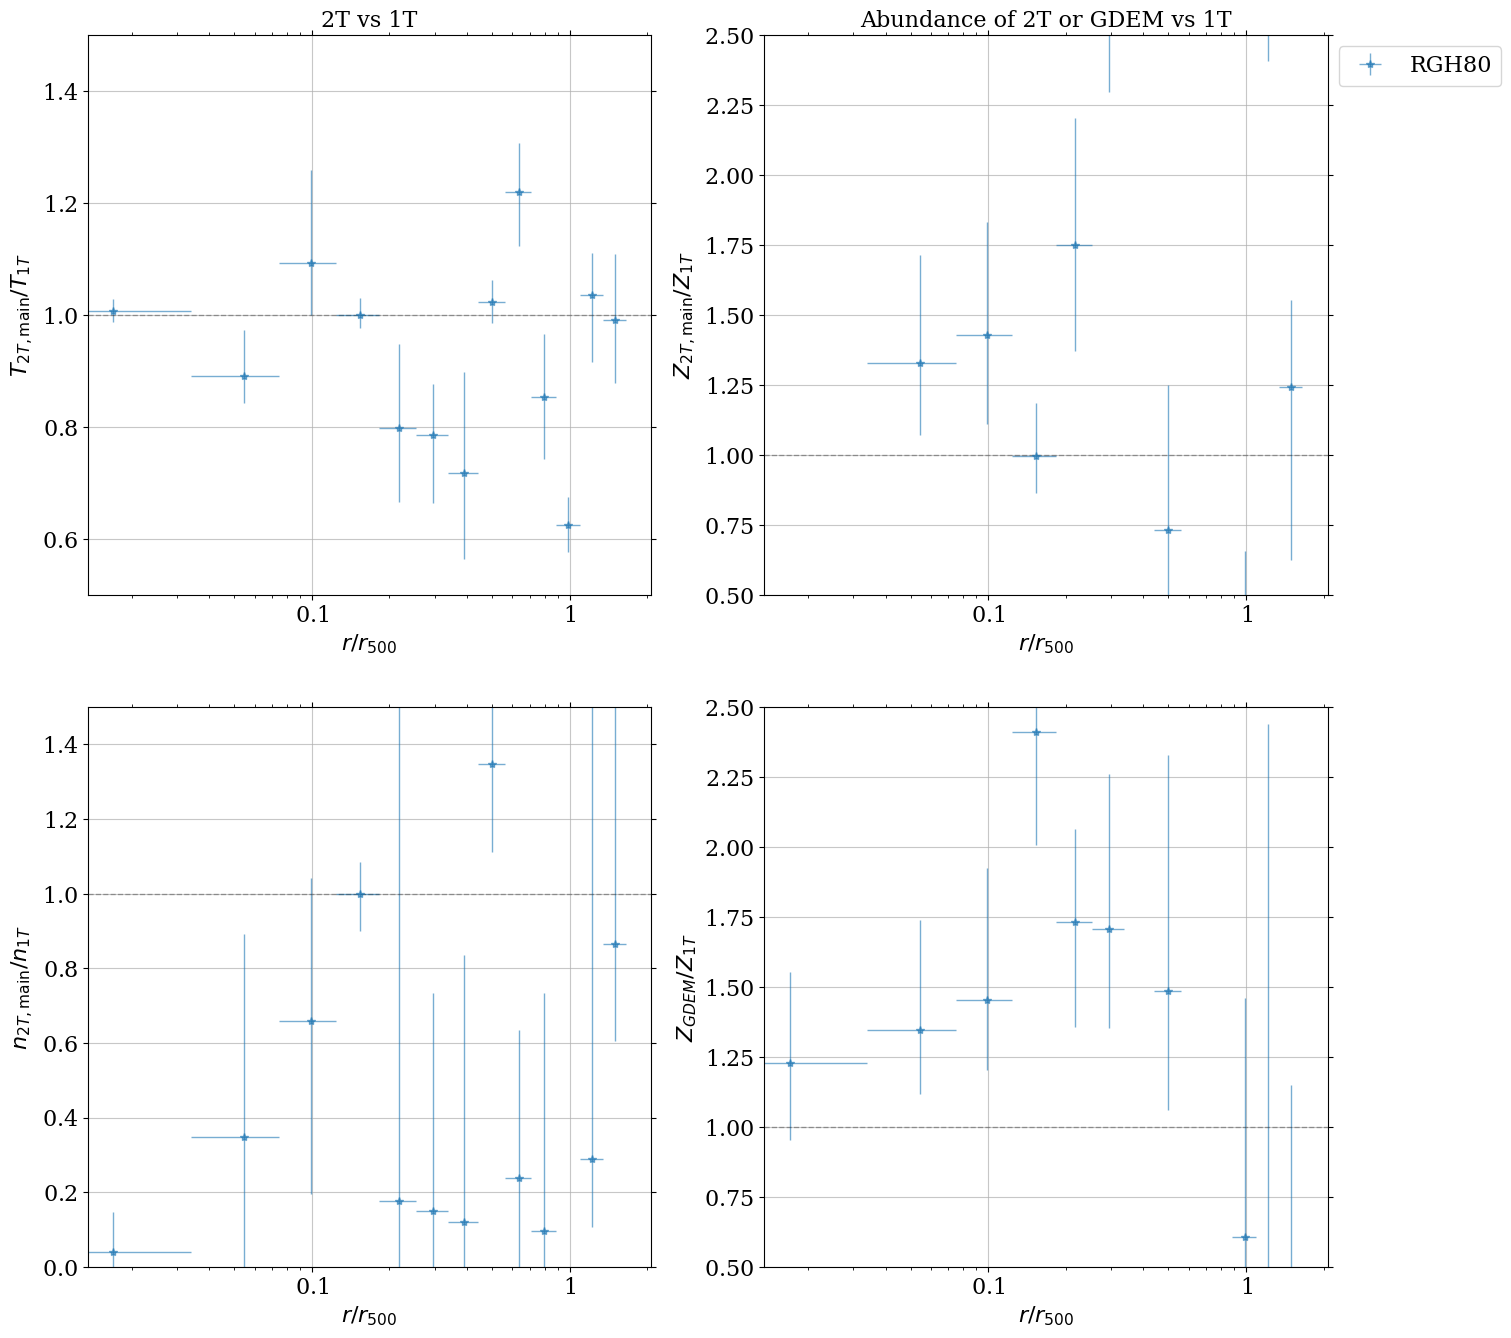

In [325]:
dfs_2T = {}
dfs_GD = {}
dfs_1T = {}

### RGH80 ####
pippath = glob(f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/RGH80/eckert/*/fit_231019/csvs')[0]
df_pip = pd.read_csv(f'{pippath}/RGH80_annuli_mypar_2T.csv')
df_pip1 = pd.read_csv(f'{pippath}/RGH80_annuli_mypar.csv')
df_gadem = pd.read_csv(f'{pippath}/RGH80_annuli_mypar_GADEM.csv')
src = 'RGH80'
dfs_2T[src] = df_pip
dfs_1T[src] = df_pip1
dfs_GD[src] = df_gadem

#### IDxxx ####

for srcnum in ['3460', '828', '9647']:
    src = f'ID{srcnum}'
    pippath = glob(f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/ID{srcnum}/eckert/ID{srcnum}/*/fit_231019/csvs')[0]
    df_pip = pd.read_csv(f'{pippath}/SDSSTG{srcnum}_annuli_mypar_2T.csv')
    df_pip1 = pd.read_csv(f'{pippath}/SDSSTG{srcnum}_annuli_mypar.csv')
    df_gadem = pd.read_csv(f'{pippath}/SDSSTG{srcnum}_annuli_mypar_GADEM.csv')
    dfs_2T[src] = df_pip
    dfs_1T[src] = df_pip1
    dfs_GD[src] = df_gadem

r500_dict = {'RGH80':7.35216, 'ID3460':7.59404, 'ID828':10.2579, 'ID9647':9.17026}
syb_dict = {'RGH80':'*', 'ID3460':'+', 'ID828':'x', 'ID9647':'o'}


def errprop_div(A, B, delta_A, delta_B):
    # Calculate the relative error in A/B
    relative_error = np.sqrt((delta_A / A)**2 + (delta_B / B)**2)
    return relative_error


fig, axs = plt.subplots(2,2, figsize=(16,16))

for i, src in enumerate(['RGH80']): # enumerate(r500_dict.keys())

    binmid = (dfs_1T[src]['rlo'] + dfs_1T[src]['rhi'])/2
    binstep = np.diff(np.insert(np.array(df_pip['rhi']),0,0))/2
    r500 = r500_dict[src]
    binmid = binmid/r500
    binstep = binstep/r500

    ## 0,0: T1 in 2T/T in 1T
    yerrlo = errprop_div(dfs_2T[src]['T-value'], dfs_1T[src]['T-value'], dfs_2T[src]['T-errlo'], dfs_1T[src]['T-errlo'])
    yerrhi = errprop_div(dfs_2T[src]['T-value'], dfs_1T[src]['T-value'], dfs_2T[src]['T-errhi'], dfs_1T[src]['T-errhi'])
    yerrlo = np.where((yerrlo<0)|(yerrlo>20), 0, yerrlo)
    yerrhi = np.where((yerrhi<0)|(yerrhi>20), 0, yerrhi)
    axs[0,0].errorbar(binmid, dfs_2T[src]['T-value']/dfs_1T[src]['T-value'], xerr = binstep, yerr = (yerrlo, yerrhi), fmt = syb_dict[src], label = src, alpha = 0.6)
    axs[0,0].set_title('2T vs 1T')
    axs[0,0].set_ylabel('$T_{2T, \\rm main}/T_{1T}$')
    axs[0,0].set_xlabel('$r/r_{500}$')
    axs[0,0].set_ylim(0.5,1.5)
    axs[0,0].set_xscale('log')
    axs[0,0].axhline(1, linestyle = 'dashed', color= 'k', alpha = 0.3)
    ## 1,0: n1 in 2T/n in 1T
    yerrlo = errprop_div(dfs_2T[src]['n-value'], dfs_1T[src]['n-value'], dfs_2T[src]['n-errlo'], dfs_1T[src]['n-errlo'])
    yerrhi = errprop_div(dfs_2T[src]['n-value'], dfs_1T[src]['n-value'], dfs_2T[src]['n-errhi'], dfs_1T[src]['n-errhi'])
    yerrlo = np.where((yerrlo<0)|(yerrlo>100), 0, yerrlo)
    yerrhi = np.where((yerrhi<0)|(yerrhi>100), 0, yerrhi)
    axs[1,0].errorbar(binmid, dfs_2T[src]['n-value']/dfs_1T[src]['n-value'], xerr = binstep, yerr = (yerrlo, yerrhi), fmt = syb_dict[src], label = src, alpha = 0.6)
    axs[1,0].set_ylabel('$n_{2T, \\rm main}/n_{1T}$')
    axs[1,0].set_xlabel('$r/r_{500}$')
    axs[1,0].set_ylim(0,1.5)
    axs[1,0].set_xscale('log')
    axs[1,0].axhline(1, linestyle = 'dashed', color= 'k', alpha = 0.3)
    
    ## 0,1: Z_2T/Z_1T
    yerrlo = errprop_div(dfs_2T[src]['Z-value'], dfs_1T[src]['Z-value'], dfs_2T[src]['Z-errlo'], dfs_1T[src]['Z-errlo'])
    yerrhi = errprop_div(dfs_2T[src]['Z-value'], dfs_1T[src]['Z-value'], dfs_2T[src]['Z-errhi'], dfs_1T[src]['Z-errhi'])
    yerrlo = np.where((yerrlo<0)|(yerrlo>20), 0, yerrlo)
    yerrhi = np.where((yerrhi<0)|(yerrhi>20), 0, yerrhi)
    axs[0,1].errorbar(binmid, dfs_2T[src]['Z-value']/dfs_1T[src]['Z-value'], xerr = binstep, yerr = (yerrlo, yerrhi), fmt = syb_dict[src], label = src, alpha = 0.6)
    axs[0,1].set_title('Abundance of 2T or GDEM vs 1T')
    axs[0,1].set_ylabel('$Z_{2T, \\rm main}/Z_{1T}$')
    axs[0,1].set_xlabel('$r/r_{500}$')
    axs[0,1].set_ylim(0.5,2.5)
    axs[0,1].set_xscale('log')
    axs[0,1].axhline(1, linestyle = 'dashed', color= 'k', alpha = 0.3)
    ## 1,1: Z_GD/Z_1T
    yerrlo = errprop_div(dfs_GD[src]['Z-value'], dfs_1T[src]['Z-value'], dfs_GD[src]['Z-errlo'], dfs_1T[src]['Z-errlo'])
    yerrhi = errprop_div(dfs_GD[src]['Z-value'], dfs_1T[src]['Z-value'], dfs_GD[src]['Z-errhi'], dfs_1T[src]['Z-errhi'])
    yerrlo = np.where((yerrlo<0)|(yerrlo>20), 0, yerrlo)
    yerrhi = np.where((yerrhi<0)|(yerrhi>20), 0, yerrhi)
    axs[1,1].errorbar(binmid, dfs_GD[src]['Z-value']/dfs_1T[src]['Z-value'], xerr = binstep, yerr = (yerrlo, yerrhi), fmt = syb_dict[src], label = src, alpha = 0.6)
    axs[1,1].set_ylabel('$Z_{GDEM}/Z_{1T}$')
    axs[1,1].set_xlabel('$r/r_{500}$')
    axs[1,1].set_ylim(0.5,2.5)
    axs[1,1].set_xscale('log')
    axs[1,1].axhline(1, linestyle = 'dashed', color= 'k', alpha = 0.3)
axs[0,1].legend(loc='upper left', bbox_to_anchor=(1, 1))


2.3 2T and GDEM

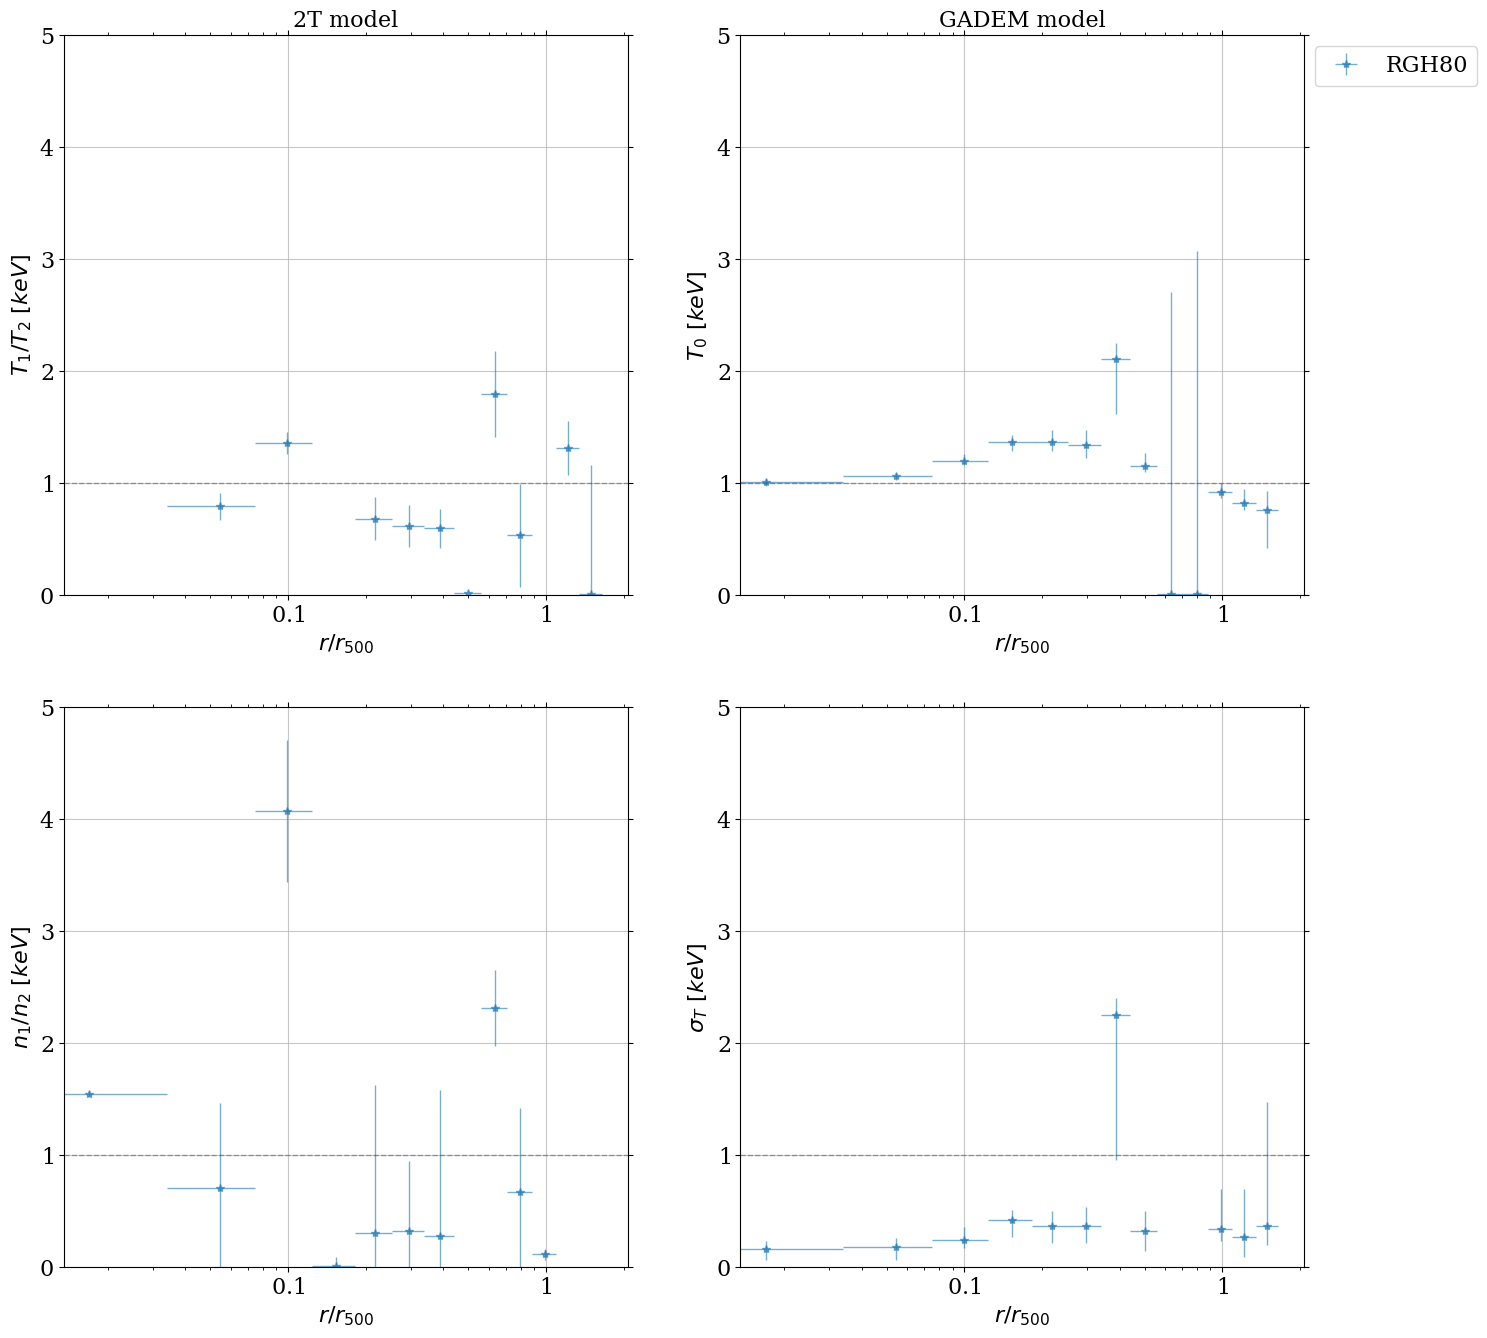

In [323]:
fig, axs = plt.subplots(2,2, figsize=(16,16))
for src in ['RGH80']: # r500_dict.keys()
    binmid = (dfs_1T[src]['rlo'] + dfs_1T[src]['rhi'])/2
    binstep = np.diff(np.insert(np.array(df_pip['rhi']),0,0))/2
    r500 = r500_dict[src]
    binmid = binmid/r500
    binstep = binstep/r500


    ## 0,0: T1/T2 in 2T model
    yerrlo = errprop_div(dfs_2T[src]['T-value'], dfs_2T[src]['T2-value'], dfs_2T[src]['T2-errlo'], dfs_2T[src]['T2-errlo'])
    yerrhi = errprop_div(dfs_2T[src]['T-value'], dfs_2T[src]['T2-value'], dfs_2T[src]['T2-errlo'], dfs_2T[src]['T2-errlo'])
    yerrlo = np.where((yerrlo<0)|(yerrlo>20), 0, yerrlo)
    yerrhi = np.where((yerrhi<0)|(yerrhi>20), 0, yerrhi)
    axs[0,0].set_title('2T model')
    axs[0,0].errorbar(binmid, dfs_2T[src]['T-value']/dfs_2T[src]['T2-value'], xerr = binstep, yerr = (yerrlo, yerrhi), fmt = syb_dict[src], label = src, alpha = 0.6)
    axs[0,0].set_ylabel('$T_1/T_2\ [keV]$')
    axs[0,0].set_xlabel('$r/r_{500}$')
    axs[0,0].set_ylim(0,5)
    axs[0,0].set_xscale('log')
    axs[0,0].axhline(1, linestyle = 'dashed', color= 'k', alpha = 0.3)

    ## 0,1: n1/n2 in 2T model
    yerrlo = errprop_div(dfs_2T[src]['n-value'], dfs_2T[src]['n2-value'], dfs_2T[src]['n2-errlo'], dfs_2T[src]['n2-errlo'])
    yerrhi = errprop_div(dfs_2T[src]['n-value'], dfs_2T[src]['n2-value'], dfs_2T[src]['n2-errlo'], dfs_2T[src]['n2-errlo'])
    yerrlo = np.where((yerrlo<0)|(yerrlo>20), 0, yerrlo)
    yerrhi = np.where((yerrhi<0)|(yerrhi>20), 0, yerrhi)
    axs[1,0].errorbar(binmid, dfs_2T[src]['n-value']/dfs_2T[src]['n2-value'], xerr = binstep, yerr = (yerrlo, yerrhi), fmt = syb_dict[src], label = src, alpha = 0.6)
    axs[1,0].set_ylabel('$n_1/n_2\ [keV]$')
    axs[1,0].set_xlabel('$r/r_{500}$')
    axs[1,0].set_ylim(0,5)
    axs[1,0].set_xscale('log')
    axs[1,0].axhline(1, linestyle = 'dashed', color= 'k', alpha = 0.3)

    ## 0,1: T0 in GDEM
    yerrlo = dfs_GD[src]['T-errlo']
    yerrhi = dfs_GD[src]['T-errhi']
    yerrlo = np.where((yerrlo<0)|(yerrlo>20), 0, yerrlo)
    yerrhi = np.where((yerrhi<0)|(yerrhi>20), 0, yerrhi)
    axs[0,1].set_title('GADEM model')
    axs[0,1].errorbar(binmid, dfs_GD[src]['T-value'], xerr = binstep, yerr = (yerrlo, yerrhi), fmt = syb_dict[src], label = src, alpha = 0.6)
    axs[0,1].set_ylabel('$T_0\ [keV]$')
    axs[0,1].set_xlabel('$r/r_{500}$')
    axs[0,1].set_ylim(0,5)
    axs[0,1].set_xscale('log')
    axs[0,1].axhline(1, linestyle = 'dashed', color= 'k', alpha = 0.3)
    ## 1,1: sigmaT in GDEM
    yerrlo = dfs_GD[src]['Tsig-errlo']
    yerrhi = dfs_GD[src]['Tsig-errhi']
    yerrlo = np.where((yerrlo<0)|(yerrlo>100), 0, yerrlo)
    yerrhi = np.where((yerrhi<0)|(yerrhi>100), 0, yerrhi)
    axs[1,1].errorbar(binmid, dfs_GD[src]['Tsig-value'], xerr = binstep, yerr = (yerrlo, yerrhi), fmt = syb_dict[src], label = src,  alpha = 0.6)
    axs[1,1].set_ylabel('$\sigma_T\ [keV]$')
    axs[1,1].set_xlabel('$r/r_{500}$')
    axs[1,1].set_ylim(0,5)
    axs[1,1].set_xscale('log')
    axs[1,1].axhline(1, linestyle = 'dashed', color= 'k', alpha = 0.3)

axs[0,1].legend(loc='upper left', bbox_to_anchor=(1, 1))


3 plot 1T xspec smoothbkg vs backgrnd bkg

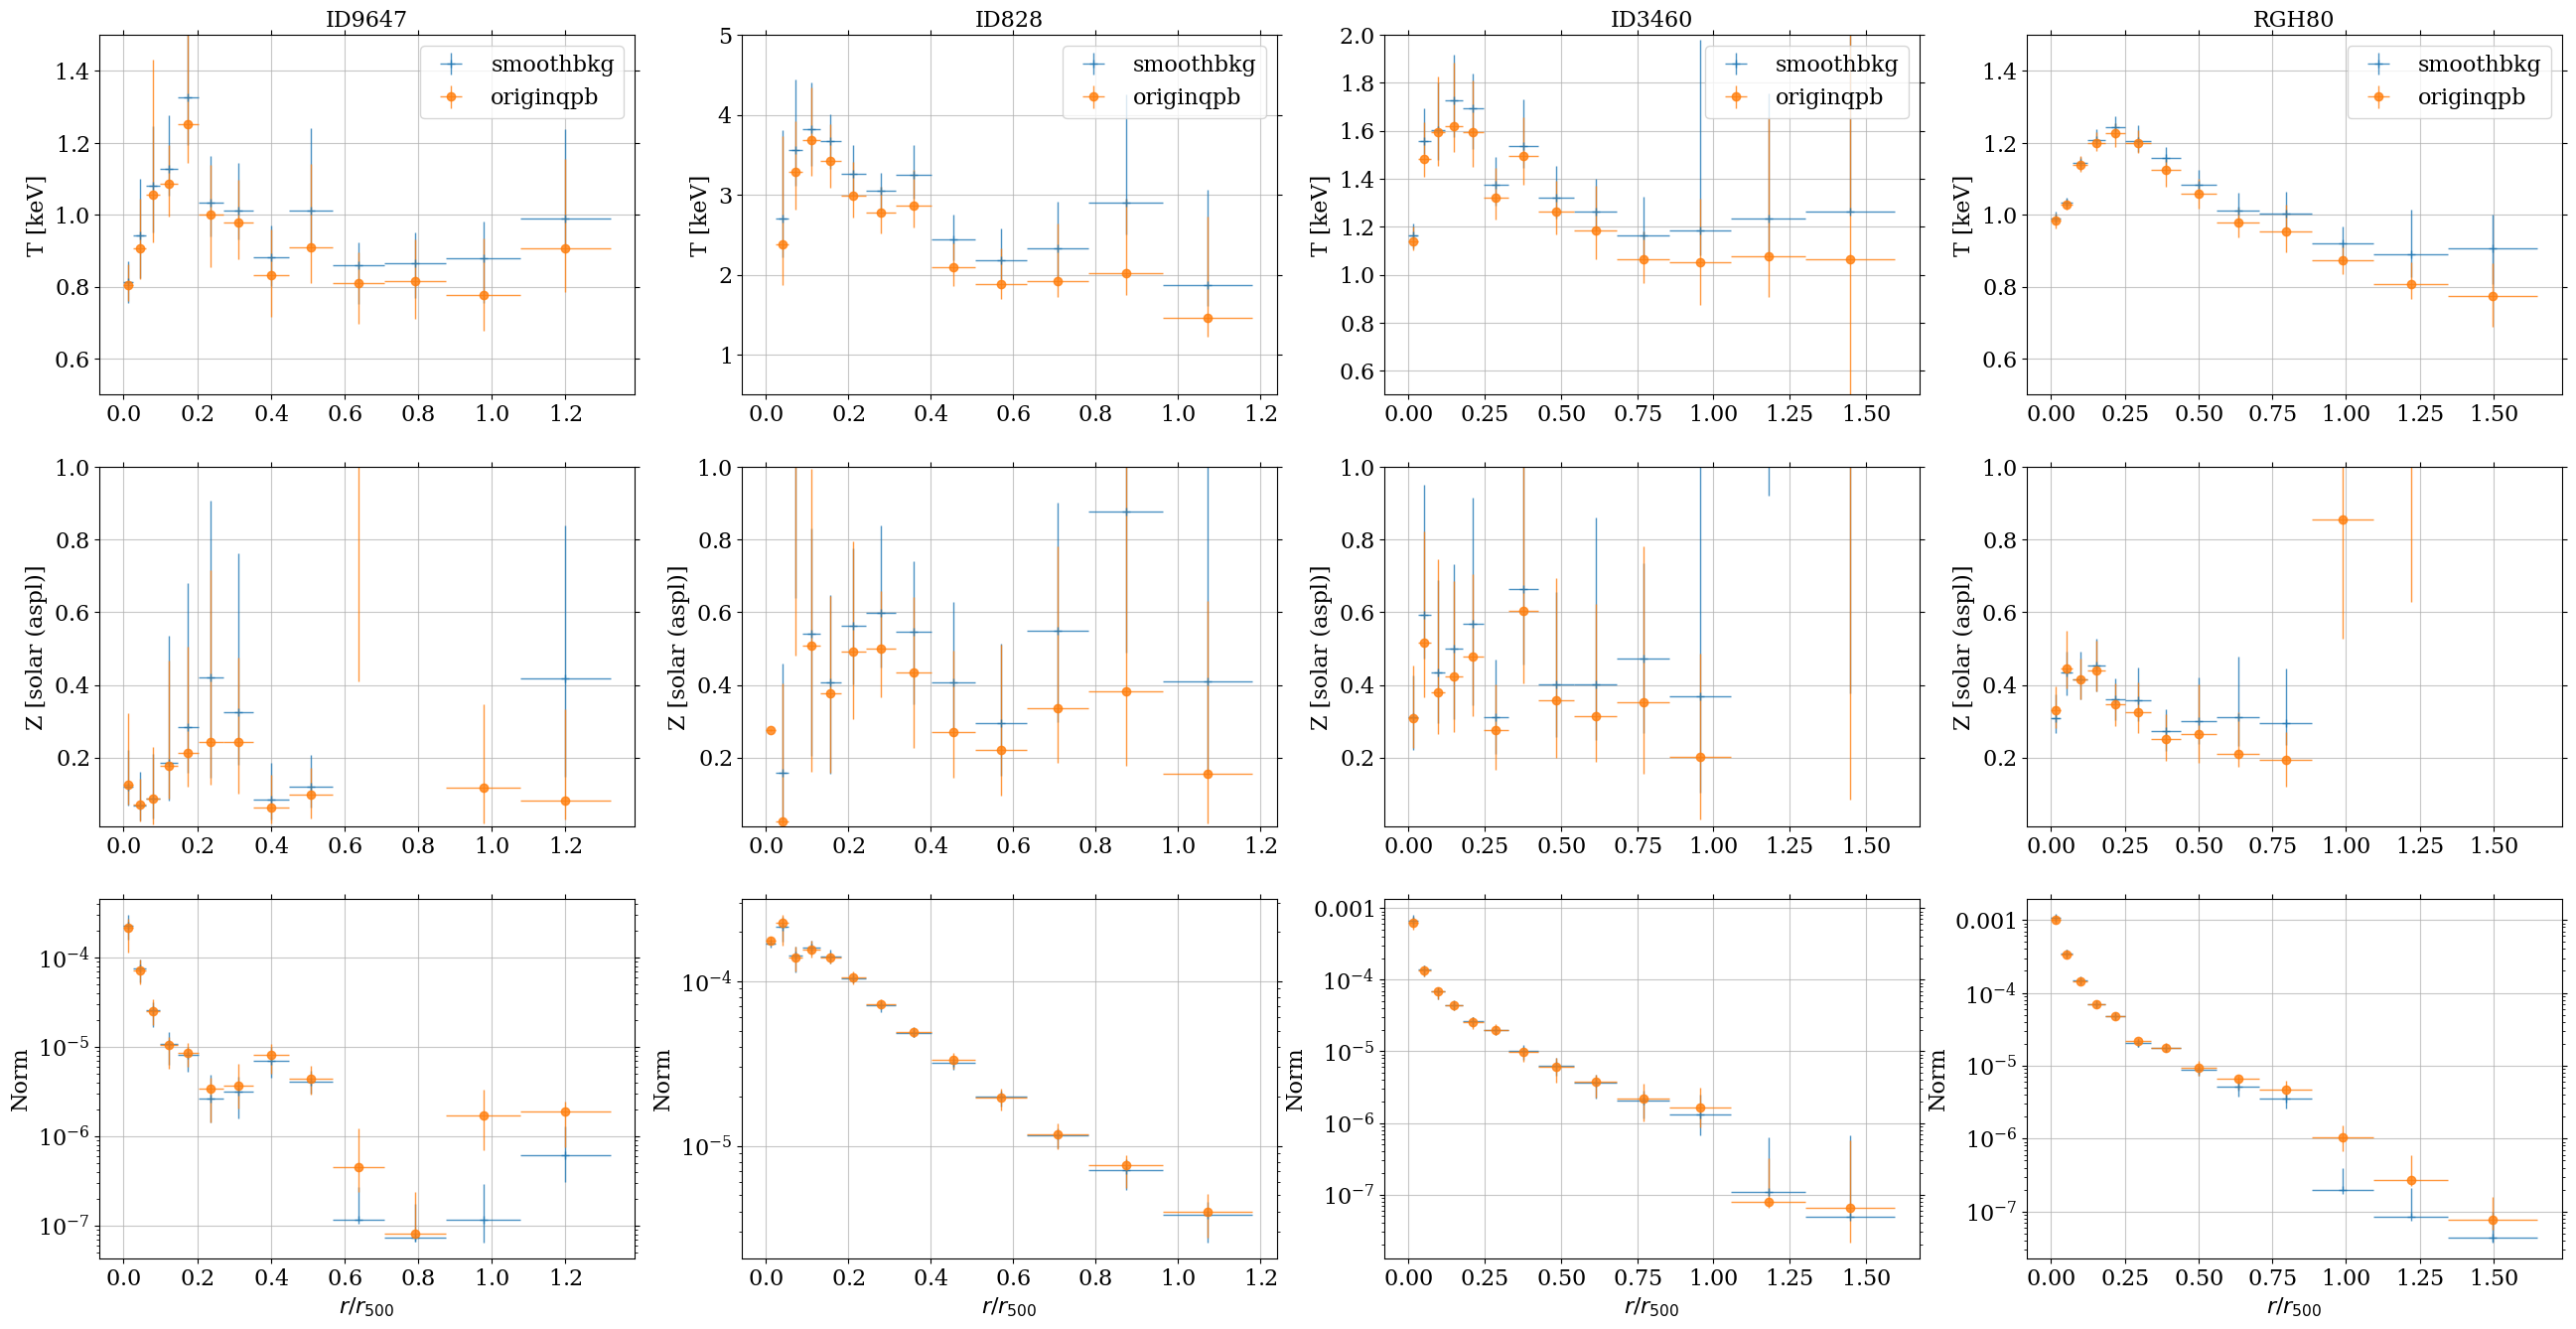

In [46]:

#### define r500 dict ####
r500_dict = {'ID9647':9.17026, 'ID828':10.2579, 'ID3460':7.59404, 'RGH80':7.35216}
temp_rg_dict = {'ID9647':(0.5,1.5), 'ID828':(0.5,5), 'ID3460':(0.5,2), 'RGH80':(0.5,1.5)}


fig, axs = plt.subplots(3,4, figsize=(32,16))

appendix = '1T'
#### define path ####
for i, SRCNAME1 in enumerate(r500_dict.keys()):
    if SRCNAME1 == 'RGH80':
        SRCNAME2 = 'RGH80'
        rootpath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/{SRCNAME1}/eckert/*/'
    else:
        SRCNAME2 = f'SDSSTG{SRCNAME1[2:]}'
        rootpath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/{SRCNAME1}/eckert/{SRCNAME1}/*'

    r500 = r500_dict[SRCNAME1]
    #### load data ####
    # load xspec from smoothbkg
    smpath = glob(f'{rootpath}/fit_231107/csvs')[0]
    # load xspec csv from originqpb
    ogpath = glob(f'{rootpath}/fit_231019/csvs')[0]
    smdf = pd.read_csv(f'{smpath}/{SRCNAME2}_annuli_{appendix}_mypar.csv')
    ogdf = pd.read_csv(f'{ogpath}/{SRCNAME2}_annuli_mypar.csv')
    #### define bins ####
    binmid = (ogdf['rlo'] + ogdf['rhi'])/2
    binstep = np.diff(np.insert(np.array(ogdf['rhi']),0,0))/2
    binmid = binmid/r500
    binstep = binstep/r500

    #### plot sources vary with columns ####
    # smooth
    axs[0, i].errorbar(binmid, smdf['T-value'], xerr = binstep, yerr = (abs(smdf['T-errlo'].values), abs(smdf['T-errhi'].values)),alpha = 0.8, label = 'smoothbkg', fmt = '+')
    axs[1, i].errorbar(binmid, smdf['Z-value'], xerr = binstep, yerr = (abs(smdf['Z-errlo'].values), abs(smdf['Z-errhi'].values)),alpha = 0.8, label = 'smoothbkg', fmt = '+')
    axs[2, i].errorbar(binmid, smdf['n-value'], xerr = binstep, yerr = (abs(smdf['n-errlo'].values), abs(smdf['n-errhi'].values)),alpha = 0.8, label = 'smoothbkg', fmt = '+')
    
    # ori
    axs[0, i].errorbar(binmid, ogdf['T-value'], xerr = binstep, yerr = (abs(ogdf['T-errlo'].values), abs(ogdf['T-errhi'].values)),alpha = 0.8, label = 'originqpb', fmt = 'o')
    axs[1, i].errorbar(binmid, ogdf['Z-value'], xerr = binstep, yerr = (abs(ogdf['Z-errlo'].values), abs(ogdf['Z-errhi'].values)),alpha = 0.8, label = 'originqpb', fmt = 'o')
    axs[2, i].errorbar(binmid, ogdf['n-value'], xerr = binstep, yerr = (abs(ogdf['n-errlo'].values), abs(ogdf['n-errhi'].values)),alpha = 0.8, label = 'originqpb', fmt = 'o')


    # plot settings
    axs[0, i].set_title(f'{SRCNAME1}')
    axs[0, i].set_ylabel('T [keV]')
    axs[2, i].set_xlabel(r'$r/r_{500}$')
    axs[0, i].legend()
    axs[0, i].set_ylim(temp_rg_dict[SRCNAME1][0],temp_rg_dict[SRCNAME1][1])

    axs[1, i].set_ylabel('Z [solar (aspl)]')
    axs[2, i].set_xlabel(r'$r/r_{500}$')
    axs[1, i].set_ylim(0.01,1)

    axs[2, i].set_ylabel('Norm')
    axs[2, i].set_xlabel(r'$r/r_{500}$')
    axs[2, i].set_yscale('log')


4 1T: spex vs xspec

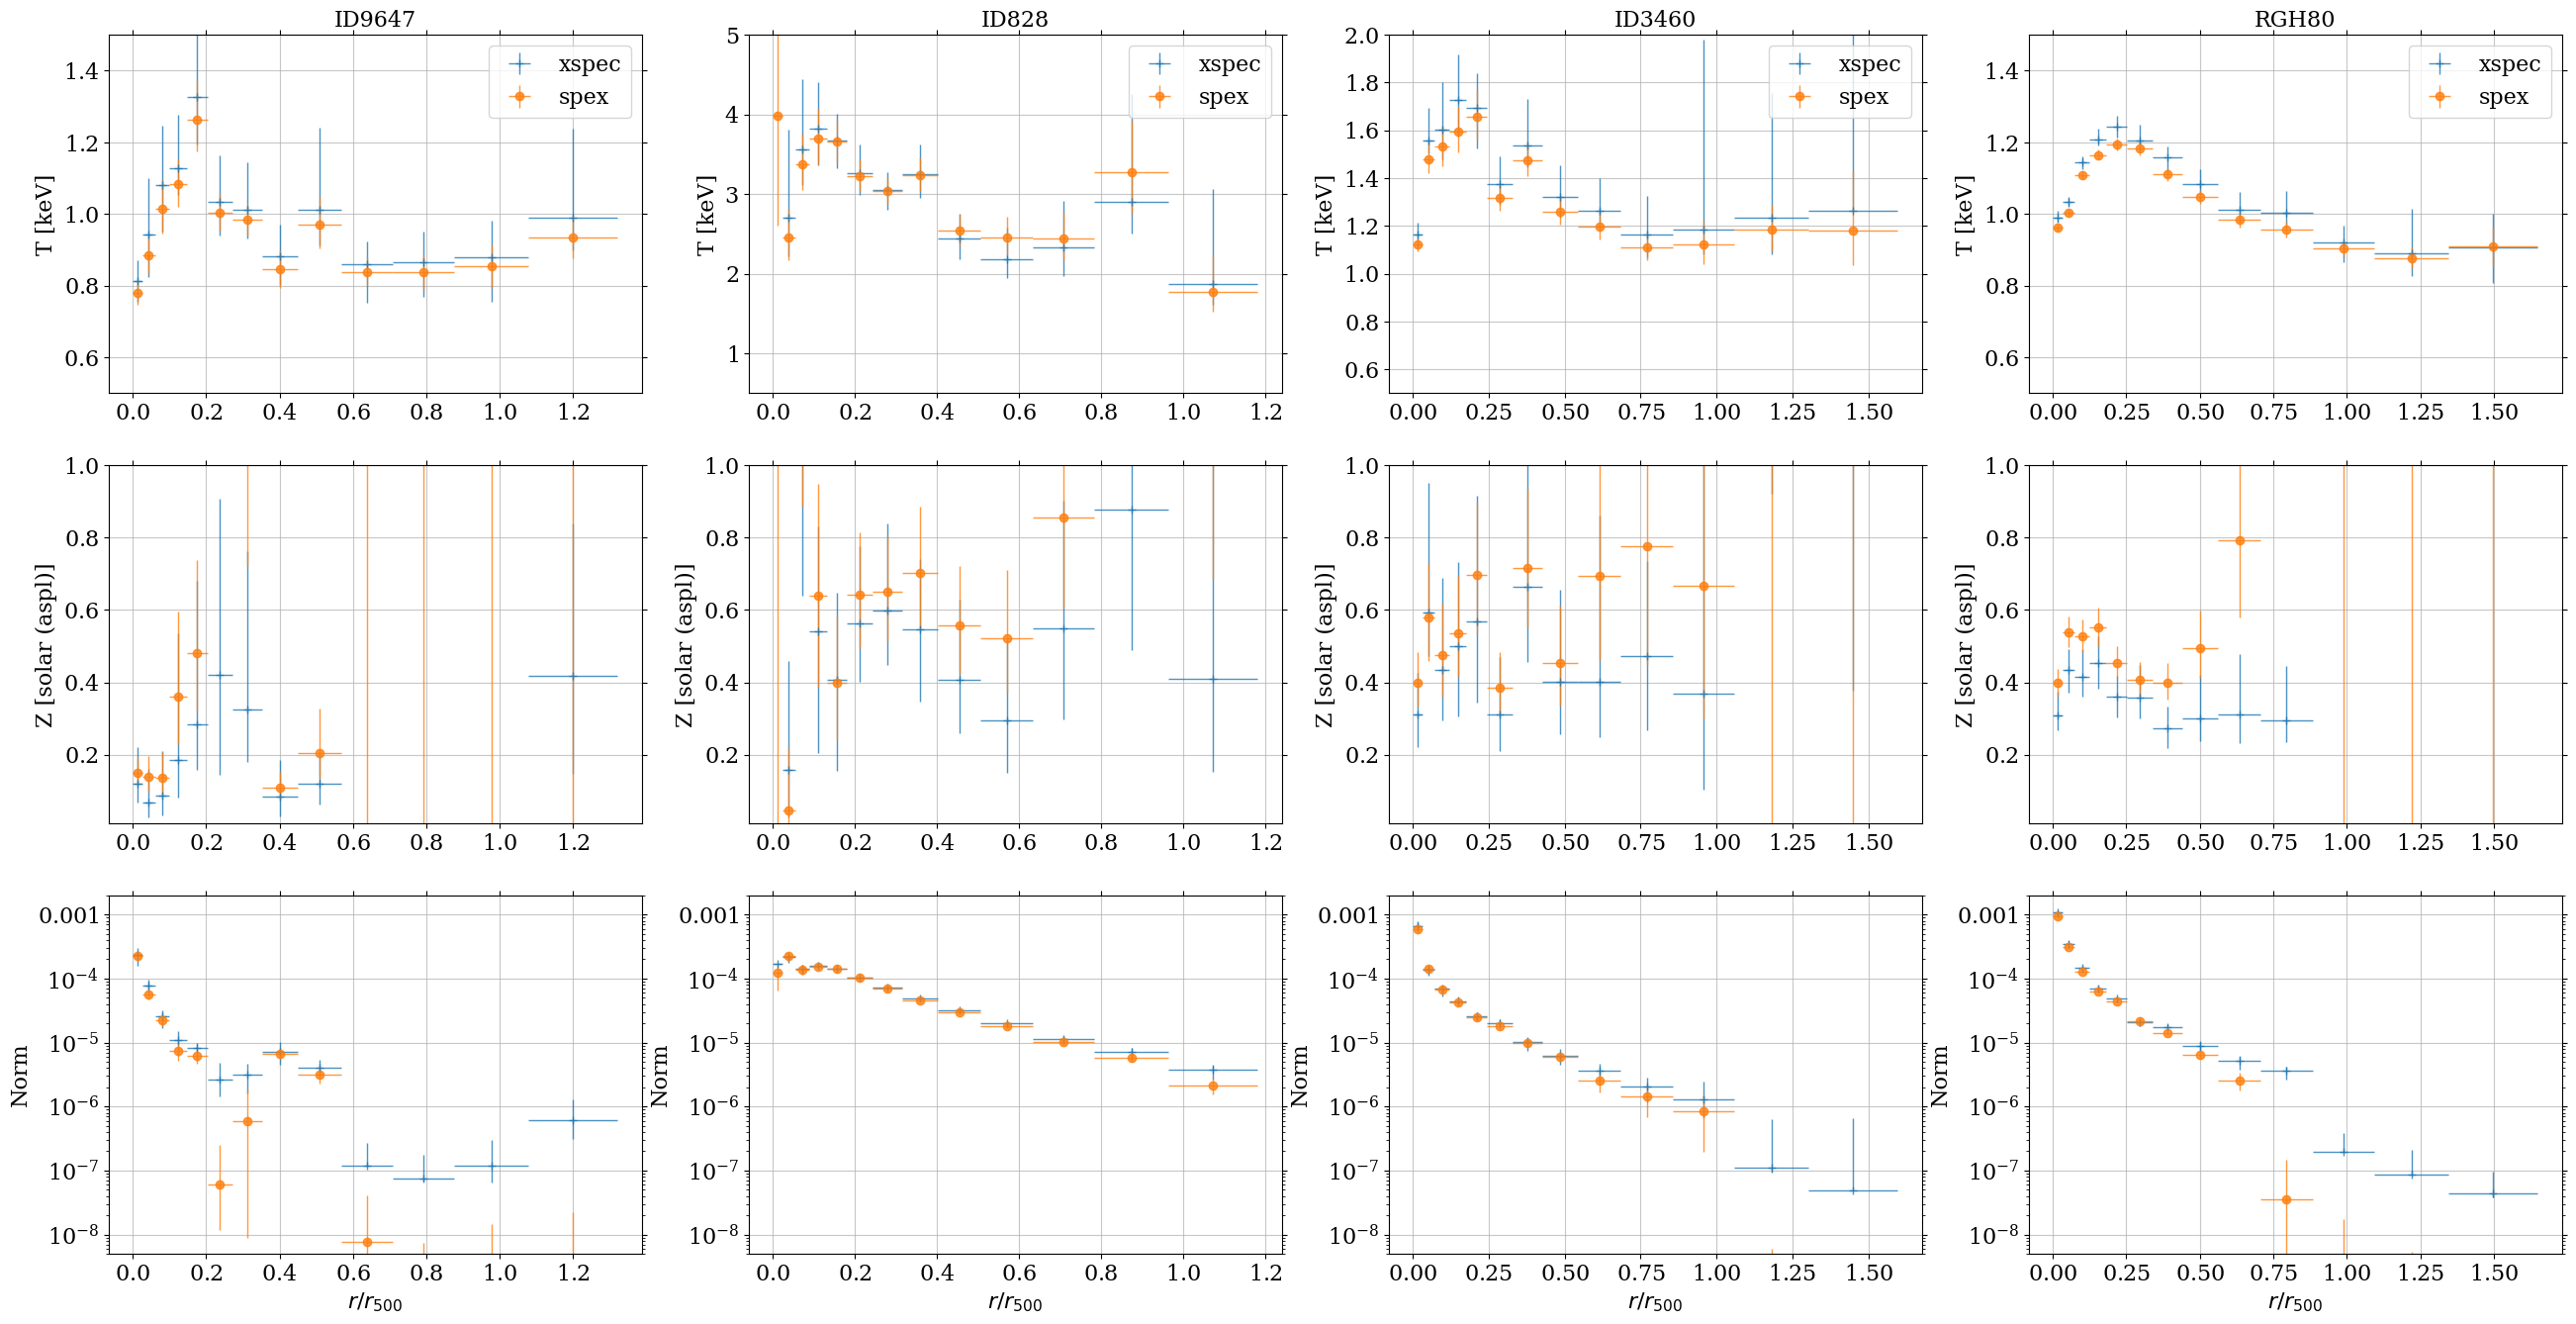

In [8]:

#### define r500 dict ####
reds_dict = {'SDSSTG3460':0.043, 'SDSSTG9647':0.023, 'SDSSTG828':0.046, 'RGH80':0.037}
r500_dict = {'ID9647':9.17026, 'ID828':10.2579, 'ID3460':7.59404, 'RGH80':7.35216}
temp_rg_dict = {'ID9647':(0.5,1.5), 'ID828':(0.5,5), 'ID3460':(0.5,2), 'RGH80':(0.5,1.5)}
norm_rg_dict = {'ID9647':(5e-9, 2e-3), 'ID828':(5e-9, 2e-3), 'ID3460':(5e-9, 2e-3), 'RGH80':(5e-9, 2e-3)}


fig, axs = plt.subplots(3,4, figsize=(32,16))

appendix = '1T'
#### define path ####
for i, SRCNAME1 in enumerate(r500_dict.keys()):
    if SRCNAME1 == 'RGH80':
        SRCNAME2 = 'RGH80'
        rootpath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/{SRCNAME1}/eckert/*/'
    else:
        SRCNAME2 = f'SDSSTG{SRCNAME1[2:]}'
        rootpath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/{SRCNAME1}/eckert/{SRCNAME1}/*'

    reds = reds_dict[SRCNAME2]
    r500 = r500_dict[SRCNAME1]
    #### load data ####
    # load xspec from xspec
    xspec_path = glob(f'{rootpath}/fit_231107/csvs')[0]
    # load xspec csv from spex
    spex_path = glob(f'{rootpath}/fit_spex_231107/csvs')[0]
    xpdf = pd.read_csv(f'{xspec_path}/{SRCNAME2}_annuli_{appendix}_mypar.csv')
    spdf = pd.read_csv(f'{spex_path}/{SRCNAME2}_annuli_mypar{appendix}.csv')
    #### define bins ####
    binmid = (spdf['rlo'] + spdf['rhi'])/2
    binstep = np.diff(np.insert(np.array(spdf['rhi']),0,0))/2
    binmid = binmid/r500
    binstep = binstep/r500

    #### plot sources vary with columns ####
    # smooth
    axs[0, i].errorbar(binmid, xpdf['T-value'], xerr = binstep, yerr = (abs(xpdf['T-errlo'].values), abs(xpdf['T-errhi'].values)),alpha = 0.8, label = 'xspec', fmt = '+')
    axs[1, i].errorbar(binmid, xpdf['Z-value'], xerr = binstep, yerr = (abs(xpdf['Z-errlo'].values), abs(xpdf['Z-errhi'].values)),alpha = 0.8, label = 'xspec', fmt = '+')
    axs[2, i].errorbar(binmid, xpdf['n-value'], xerr = binstep, yerr = (abs(xpdf['n-errlo'].values), abs(xpdf['n-errhi'].values)),alpha = 0.8, label = 'xspec', fmt = '+')
    
    # ori
    axs[0, i].errorbar(binmid, spdf['T-value'], xerr = binstep, yerr = (abs(spdf['T-errlo'].values), abs(spdf['T-errhi'].values)),alpha = 0.8, label = 'spex', fmt = 'o')
    axs[1, i].errorbar(binmid, spdf['Z-value'], xerr = binstep, yerr = (abs(spdf['Z-errlo'].values), abs(spdf['Z-errhi'].values)),alpha = 0.8, label = 'spex', fmt = 'o')
    axs[2, i].errorbar(binmid, norm_sp2xp(reds, spdf['n-value']), xerr = binstep, yerr = (norm_sp2xp(reds, abs(spdf['n-errlo'].values)), norm_sp2xp(reds, abs(spdf['n-errhi'].values))),alpha = 0.8, label = 'spex', fmt = 'o')


    # plot settings
    axs[0, i].set_title(f'{SRCNAME1}')
    axs[0, i].set_ylabel('T [keV]')
    axs[2, i].set_xlabel(r'$r/r_{500}$')
    axs[0, i].legend()
    axs[0, i].set_ylim(temp_rg_dict[SRCNAME1][0],temp_rg_dict[SRCNAME1][1])

    axs[1, i].set_ylabel('Z [solar (aspl)]')
    axs[1, i].set_ylim(0.01,1)

    axs[2, i].set_ylabel('Norm')
    axs[2, i].set_xlabel(r'$r/r_{500}$')
    axs[2, i].set_yscale('log')
    axs[2, i].set_ylim(norm_rg_dict[SRCNAME1][0],norm_rg_dict[SRCNAME1][1])


appendix func

In [ ]:
def sort_files(flist):
    pattern = r'_reg(\d+)'
    idxlst = []
    for file_name in flist:
        match = re.search(pattern, file_name)
        number = match.group(1)
        idxlst.append(number)
    return np.argsort(idxlst)

